In [1]:
from mesh import Mesh
from dt_mesh_deformation import DT_Mesh_Deform
from dtrbf_mesh_deformation import DTRBF1_Mesh_Deform
from dtidw_mesh_deformation import DTIDW_Mesh_Deform
from dtad_mesh_deformation import DTAD_Mesh_Deform
from dtvote_mesh_deformation import DTV_Mesh_Deform
import numpy as np

In [2]:
v = []
for i in range(-10,11):
  for j in range(-10,11):
    if not (i >= -1 and i <= 1 and j == 0):
      v.append([i,j])

f = []
for i in range(-10,10):
  for j in range(-10,10):
    if not (i >= -2 and i <= 1 and j >= -1 and j <= 0):      
      f.append([[i,j], [i+1,j], [i+1,j+1], [i,j+1]])


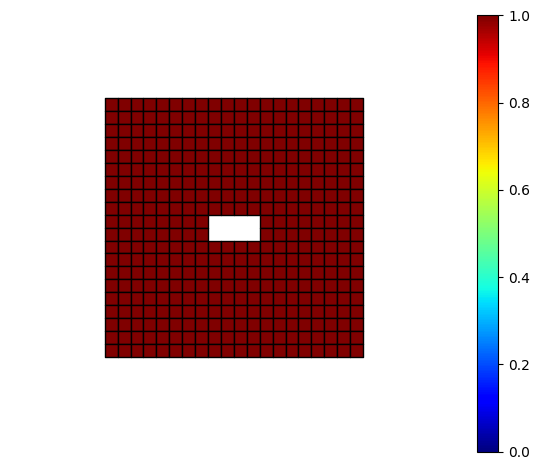

In [3]:
fi = Mesh.faces_points_to_index(v, f)
mesh = Mesh(v,fi,2)
mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)

In [4]:
exterior = []

for i in range(-10,11):
  exterior.append([-10,i])
  exterior.append([10,i])
for i in range(-9,10):
  exterior.append([i,-10])
  exterior.append([i,10])

for i in range(-2,3):
  exterior.append([i,-1])
  exterior.append([i,1])

exterior.append([-2,0])
exterior.append([2,0])

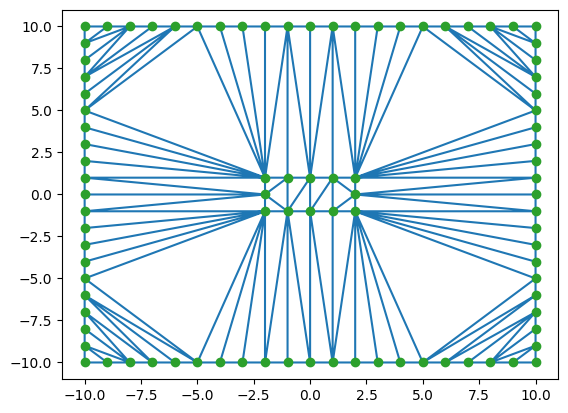

In [5]:
DT_Mesh_Deform.visualize_delaunay(exterior)

In [6]:
exterior_mapping = {}
rotation_mapping = {}

for p in exterior:
  x = p[0]
  y = p[1]
  theta = np.pi / 6
  rotate = np.array([
      [np.cos(theta), -np.sin(theta)],
      [np.sin(theta),  np.cos(theta)]
  ])

  if (x >= -5 and x <= 5 and y >= -5 and y <= 5):
    exterior_mapping[(x,y)] = tuple(np.dot(rotate, (x,y)))
    rotation_mapping[(x,y)] = theta
  else:
    exterior_mapping[(x,y)] = (x,y)
    rotation_mapping[(x,y)] = 0


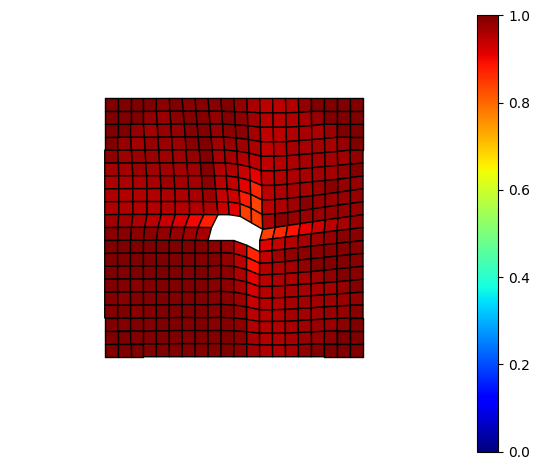

0.8395785852905037
0.9728135852536999


In [7]:
new_mesh = DTV_Mesh_Deform.deform(mesh, exterior, exterior_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

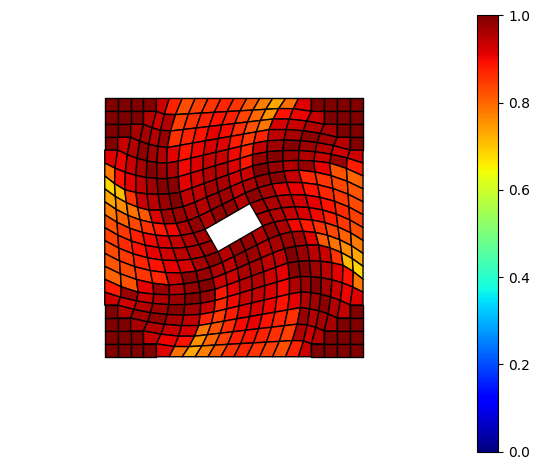

0.6814344808444938
0.9185061287433759


In [8]:
new_mesh = DT_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))

[0.81 0.81 1.  ]
[0. 0. 0.]
[0.73715729 1.         0.81      ]
[0. 0. 0.]
[0.81       0.51431458 1.        ]
[0. 0. 0.]
[0.40888974 1.         0.81      ]
[0. 0. 0.]
[1.   0.81 0.25]
[0. 0. 0.]
[1.         0.81       0.08578644]
[0. 0. 0.]
[1.         0.81       0.02119925]
[-0.01854149  0.00917953  0.52388953]
[1.         0.81       0.03075775]
[-0.02070608  0.00566107  0.52411564]
[1.         0.81       0.03754845]
[-1.92638612e-02 -5.23735929e-04  5.24338213e-01]
[1.   0.81 0.04]
[-0.01461914 -0.00785185  0.52447837]
[0.81 0.04 1.  ]
[-0.00785185  0.52447837 -0.01461914]
[0.03754845 1.         0.81      ]
[ 0.52447837 -0.00785185 -0.01461914]
[1.         0.81       0.03754845]
[-0.00785185 -0.01461914  0.52447837]
[1.         0.81       0.03075775]
[-5.23735929e-04 -1.92638612e-02  5.24338213e-01]
[1.         0.81       0.02119925]
[ 0.00566107 -0.02070608  0.52411564]
[1.         0.81       0.01114562]
[ 0.00917953 -0.01854149  0.52388953]
[0.81       0.18862915 1.        ]
[0. 0. 

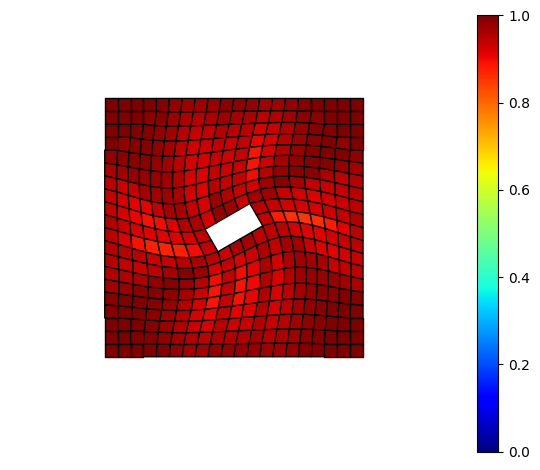

0.8526540602294989
0.9553459692777829


In [9]:
new_mesh = DTRBF1_Mesh_Deform.deform_rotation(mesh, exterior, rotation_mapping)
new_mesh.visualize(min_x = -10, max_x = 10, min_y = -10, max_y = 10, show_axis=False)
print(min(new_mesh.qualities))
print(np.sum(new_mesh.qualities)/len(new_mesh.qualities))